In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
df=pd.read_csv('../Data/basic_dataset.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              258 non-null    int64  
 1   Income_k$        258 non-null    int64  
 2   Education_Level  258 non-null    int64  
 3   Spending_Score   258 non-null    float64
 4   Purchased        258 non-null    int64  
 5   Customer_Type    258 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.2+ KB


In [52]:
df.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type
0,56,56,1,77.218532,0,B
1,46,31,1,58.605438,1,B
2,32,74,1,69.175872,1,B
3,25,32,0,18.430414,0,A
4,38,42,1,49.654097,1,A


In [53]:
df.Customer_Type.value_counts()

Customer_Type
B    154
A    104
Name: count, dtype: int64

## EDA

In [54]:
df['Purchased'].value_counts(normalize=True)

Purchased
1    0.585271
0    0.414729
Name: proportion, dtype: float64

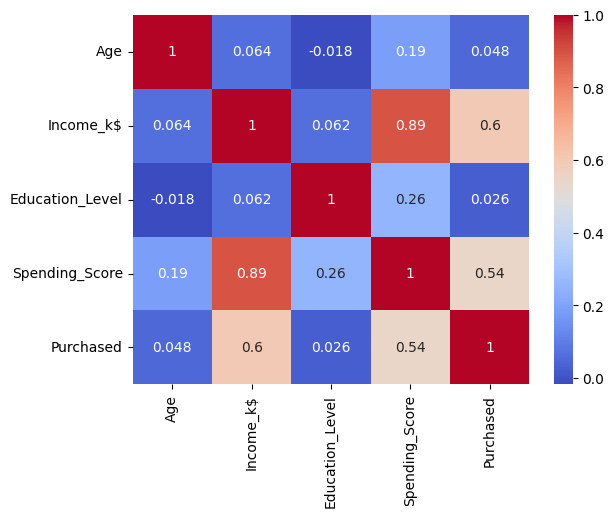

In [55]:
# correlation matrix
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

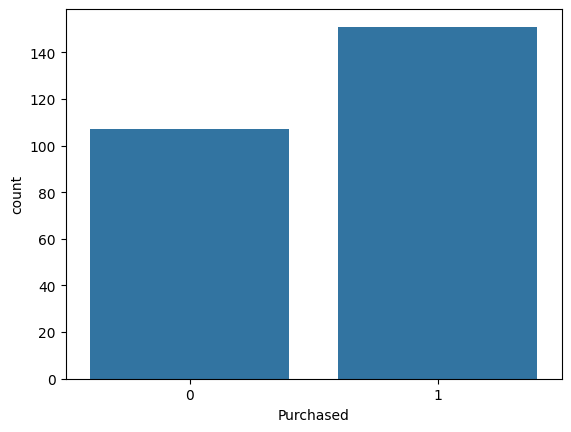

In [56]:
sns.countplot(x=df['Purchased'])
plt.show()

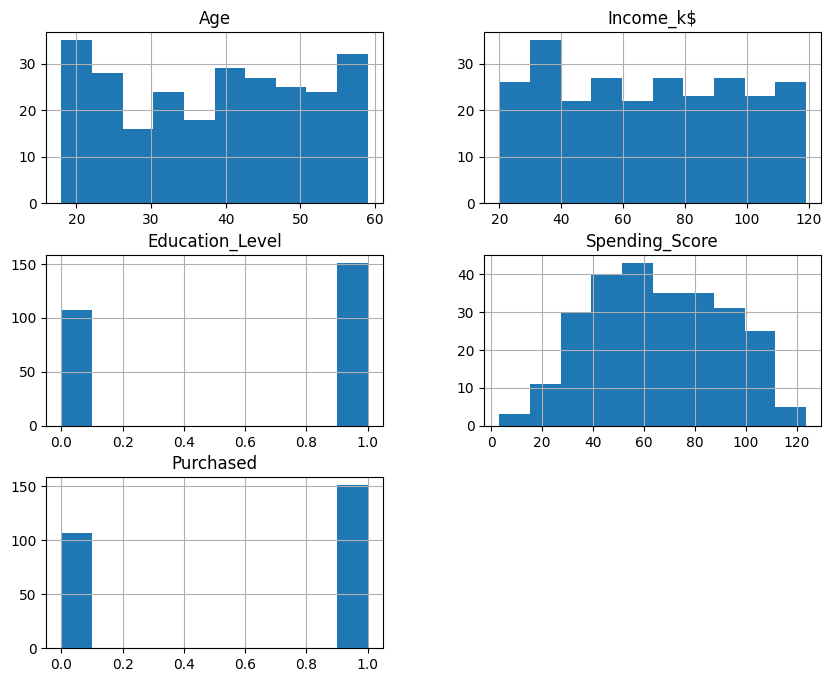

In [57]:
df.hist(figsize=(10,8))
plt.show()

## Feature Engineering

In [58]:
df.shape

(258, 6)

In [59]:
# create dummy data for customer data
df_encoded=pd.get_dummies(df,columns=['Customer_Type'],dtype=int,drop_first=True)

In [60]:
df.shape

(258, 6)

In [61]:
df.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type
0,56,56,1,77.218532,0,B
1,46,31,1,58.605438,1,B
2,32,74,1,69.175872,1,B
3,25,32,0,18.430414,0,A
4,38,42,1,49.654097,1,A


## Train and Test data

In [62]:
df_train,df_test=train_test_split(df_encoded,test_size=0.3,random_state=100)

In [63]:
df_train.shape

(180, 6)

In [64]:
df_test.shape

(78, 6)

### Create Train Data

In [65]:
y_train=df_train.pop('Purchased')
X_train=df_train

In [66]:
X_train.head()

,Age,Income_k$,Education_Level,Spending_Score,Customer_Type_B
37,35,72,1,76.547011,1
191,36,30,1,44.766283,0
203,51,118,1,114.253969,0
125,32,55,0,50.451998,1
153,28,55,1,51.390519,1


In [68]:
y_train.head()

37     1
191    0
203    1
125    0
153    0
Name: Purchased, dtype: int64

### Create Test Data

In [69]:
y_test=df_test.pop('Purchased')
X_test=df_test

In [70]:
X_test.head()

,Age,Income_k$,Education_Level,Spending_Score,Customer_Type_B
212,46,24,1,25.072729,0
200,55,96,1,104.169201,0
163,56,83,0,79.425349,1
41,26,58,1,58.146110,1
97,58,77,0,73.415950,1


In [71]:
y_test.head()

212    0
200    1
163    1
41     0
97     0
Name: Purchased, dtype: int64

## Build Model lg_1

In [72]:
lg_1=LogisticRegression()
lg_1.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_pred = lg_1.predict(X_test)


### Metric

In [ ]:
# accuracy for train data
print(f"Accuracy on train data using model lg_1:", accuracy_score(y_test,y_pred))

Accuracy of model lg_1: 0.782051282051282


In [79]:
# confusion matrix of train data
# [
# [TP FP]
# [FN TN]
# ]
print(f"Confusion Matrix of train data using model lg_1\n{confusion_matrix(y_test,y_pred)}")

Confusion Matrix of train data using model lg_1
[[21  9]
 [ 8 40]]
